In [22]:
# Problem 1 part 3 and 4
import numpy as np

X = np.array(([1, 0, 0], [-1, -1, 1]))
W1 = np.array(([1, 0], [-1, 0], [0, 0.5]))
W2 = np.array(([1, 0, 0], [-1, -1, 0]))
V = np.array(([1, 1], [0, 0], [-1, -1]))
b1 = np.array(([0], [0], [1]))
b2 = np.array(([1], [-1]))
c = np.array(([1], [0], [0]))

def ff_nn_2_Relu(X, W1, W2, V, b1, b2, c):
    Z1 = np.dot(W1, X) + b1
    H1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2, H1) + b2
    H2 = np.maximum(Z2, 0)
    Zout = np.dot(V, H2) + c
    
    # implementing softmax function
    return np.exp(Zout) / np.sum(np.exp(Zout), axis=0)

class_probability = ff_nn_2_Relu(X, W1, W2, V, b1, b2, c)
class_probaility

In [23]:
# For sample 1 the probabilities for class 1 is 0.946, the probabilities for class 2 is 0.047, 
# the probabilities for class 3 is 0.00637

# For sample 2 the probablities for class 1 is 0.8438, the probabilities for class 2 is 0.1142, 
# the probabilities for class 3 is 0.04201

# For sample 3 the probablities for class 1 is 0.8438, the probabilities for class 2 is 0.1142, 
# the probabilities for class 3 is 0.04201

array([[0.94649912, 0.84379473, 0.84379473],
       [0.04712342, 0.1141952 , 0.1141952 ],
       [0.00637746, 0.04201007, 0.04201007]])

In [40]:
# Problem 2 part 2
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

import matplotlib.cm as cm
from __future__ import division
import random

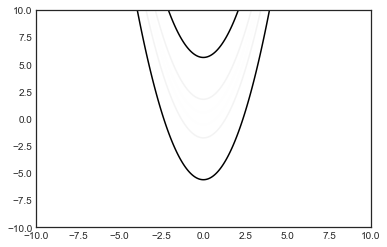

In [98]:
X = np.arange(-10.0, 10.0, 0.001)
Y = np.arange(-10.0, 10.0, 0.001)
X, Y = np.meshgrid(X, Y)
def f(X,Y):
    Z = (1-X)**2 + 100*(Y - X**2)**2
    return Z

Z = f(X, Y)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, np.logspace(-0.5, 3.5, 5, base = 10))
plt.show()

In [99]:
# part3 gradient descent algorithm
def grad_f(vector):
    x, y = vector
    df_dx = -2 *(1-x) - 400*x*(y - x**2)
    df_dy = 200*(y - x**2)
    return np.array([df_dx, df_dy])

In [112]:
def grad_descent(starting_point = None, iterations = 100, learning_rate = 0.1):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10, 10, size = 2) # pick two values from uniform distribution(-10, 10)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in subtract
  # Remove the CWD from sys.path while we load stuff.


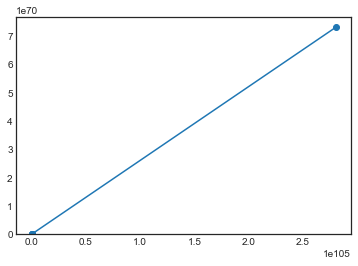

In [114]:

# try learning rate of 1
traj = grad_descent(starting_point = [1.5, 1.5], learning_rate = 1) # list of points(in list format)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, np.logspace(-0.5, 3.5, 5, base = 10))
x = traj[:, 0]
y = traj[:, 1]
plt.plot(x, y, '-o')
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


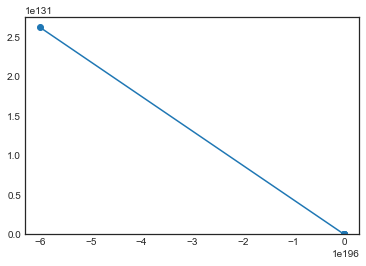

In [116]:
# try learning rate of 0.1
traj = grad_descent(starting_point = [1.5, 1.5], iterations = 50000, learning_rate = 0.1) # list of points(in list format)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, np.logspace(-0.5, 3.5, 5, base = 10))
x = traj[:, 0]
y = traj[:, 1]
plt.plot(x, y, '-o')
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


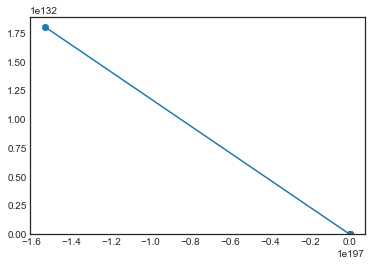

In [110]:
# try learning rate of 5
traj = grad_descent(learning_rate = 5) # list of points(in list format)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, np.logspace(-0.5, 3.5, 5, base = 10))
x = traj[:, 0]
y = traj[:, 1]
plt.plot(x, y, '-o')
plt.show()

In [104]:
# part 4
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        # use information from previous gradient value
        v = alpha*v + epsilon*grad 
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


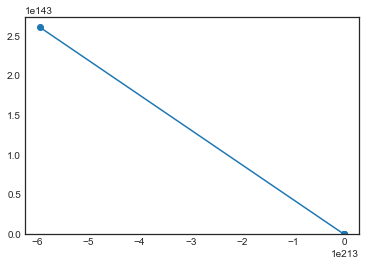

In [105]:
np.random.seed(66)
# try default value
traj = grad_descent_with_momentum()

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, np.logspace(-0.5, 3.5, 5, base = 10))
x = traj[:, 0]
y = traj[:, 1]
plt.plot(x, y, '-o')
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in add
  del sys.path[0]


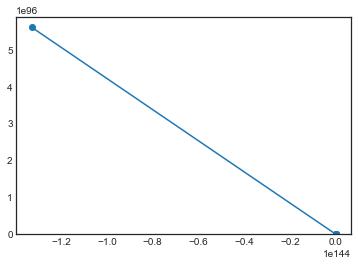

In [106]:

# try epsilon = 2 and alpha = 5
traj = grad_descent_with_momentum(iterations=50, epsilon=2, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


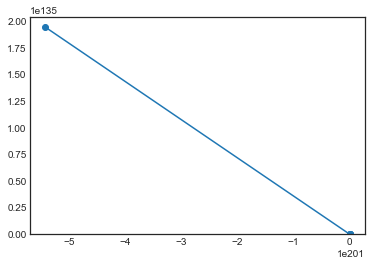

In [107]:
np.random.seed(66)
# try epsilon = 5 and alpha = 0.7
traj = grad_descent_with_momentum(iterations=50, epsilon=5, alpha=.7)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

In [141]:
def loss(y, y_hat):
    # Root Mean Squared loss metric
    return -1 *np.sum(y * np.log(y_hat))

def softmax(Z3):
    return np.exp(Z3) / np.sum(np.exp(Z3), axis=0)

def ReLu(x):
    return np.maximum(0, x)

def ReLu_derivative(x):
    return np.where(x>0, 1, 0)

def ff_nn_2_Relu(X, W1, W2, V, b1, b2, c):
    Z1 = np.dot(W1, X) + b1
    H1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2, H1) + b2
    H2 = np.maximum(Z2, 0)
    Zout = np.dot(V, H2) + c
    
    # implementing softmax function
    return softmax(Zout)

def forward(X, W1, W2, V, b1, b2, c):
    Z1 = np.dot(W, np.transpose(X)) + b1
    H1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2, H1) + b2
    H2 = np.maximum(Z2, 0)
    Z3 = np.dot(V, H2) + c
    
    return Z1, H1, Z2, H2, Z3, softmax(Z3)

In [142]:
# problem 3
# part2
def grad_f(X, W1, W2, V, b1, b2, c, y_standard):
    """
    Computes local gradient vector for squared-error loss on OLS regression model cofficients
    """
    Z1, H1, Z2, H2, Zout, y = forward(X, W1, W2, V, b1, b2, c)
    W1_try = np.zeros((3,2))
    b1_try= np.zeros((3,1))
    W2_try =np.zeros((2,3))
    b2_try =np.zeros((2,1))
    V_try = np.zeros((3,2))
    c_try = np.zeros((3,1))
    
    for i in range(x.shape[0]):
        diff3 = (y[i].reshape(3,1) - y_standard[i].reshape(3,1))
      
        c_try+= diff3
        V_try +=  np.dot(a2[i].reshape(1,2), diff3)
        diff2 = np.dot(np.transpose(V)*diff3)*ReLu_derivative(Z2[i].reshape(2,1))
        b2_try += diff2
        W2_try += np.dot(del2,H1[i]).reshape(1,3)
        diff1 = np.dot(W2, diff2)*drelu(z1[i].reshape(3,1))
        b1_try += diff1
        W1_try += np.dot(diff1, x[i].reshape(1,2))
    
    W1_try /= x.shape[0]
    b1_try /= x.shape[0]
    W2_try  /= x.shape[0]
    b2_try  /= x.shape[0]
    V_try  /= x.shape[0]
    c_try  /= x.shape[0]
    
    return [W1_try,b1_try,W2_try,b2_try,V_try,c_try,y]
    
    

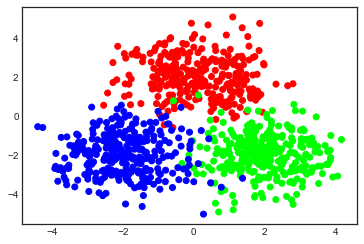

In [143]:
# part3
sigma = [[1, 0], [0, 1]]
x1 = np.random.multivariate_normal(mean = [0, 2], cov=sigma, size = 300)
x2 = np.random.multivariate_normal(mean = [2, -2], cov=sigma, size = 300)
x3 = np.random.multivariate_normal(mean = [-2, -2], cov=sigma, size = 300)
x = np.concatenate([x1,x2,x3])
y1 = np.array([[1,0,0] for i in range(300)])
y2 = np.array([[0,1,0] for i in range(300)])
y3 = np.array([[0,0,1] for i in range(300)])
y = np.concatenate([y1,y2,y3])
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [144]:
def gradient_descent(x,y,parameters,iterations, learning_rate):
    losses = []
    for i in range(iterations):
        gradients = grad_f(x,*parameters, y)
        losses.append(loss(gradients[-1],y))
        gradients = gradients[:-1]
        for j in range(len(parameters)):
            weights[j]-= learning_rate*gradients[j]
    plt.plot(list(range(iterations)), losses)
    plt.title('total loss: '+str(losses[-1]))
    plt.show()

    np.random.seed(10)
w1 =np.random.uniform(size =(3,2))
b1 = np.random.uniform(size = (3,1))
w2 = np.random.uniform(size =(2,3))
b2 = np.random.uniform(size = (2,1))
V =np.random.uniform(size =(3,2))
c =np.random.uniform(size = (3,1))
parameters = [w1,w2,V,b1,b2, c]


gradient_descent(x,y,parameters,300,0.05)
gradient_descent(x,y,parameters,300,0.01)
gradient_descent(x,y,parameters,300,0.1)

ValueError: cannot reshape array of size 900 into shape (3,1)

900